In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
data=files.upload()

Saving car_age_price.csv to car_age_price.csv


In [4]:
data=pd.read_csv('car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [5]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [22]:
data.shape

(112, 2)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [8]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


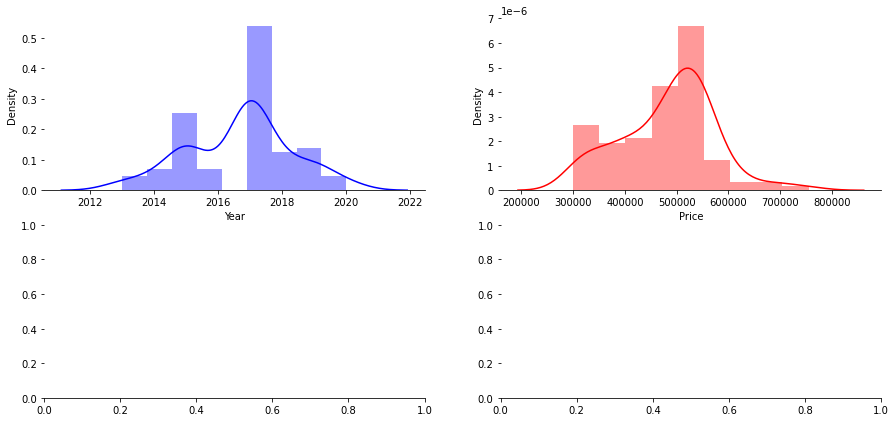

In [24]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(data.Year, color="b", ax=axes[0, 0])

sns.distplot(data.Price, color="r", ax=axes[0, 1])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


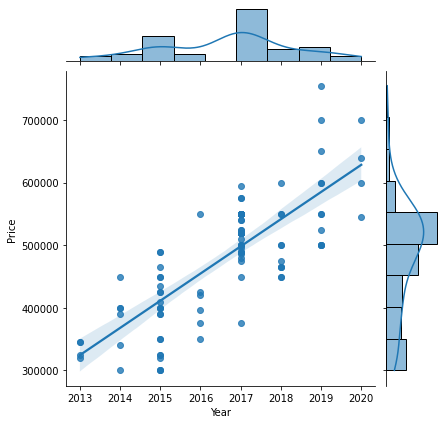

In [27]:
data1=sns.jointplot("Year", "Price", data=data, kind='reg')

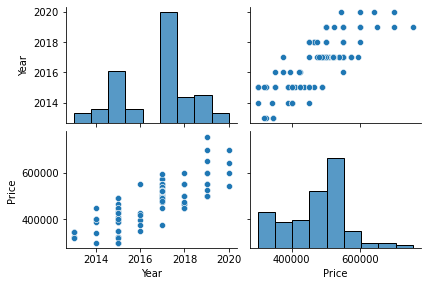

In [28]:
sns.pairplot(data, height = 2, aspect = 1.5)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


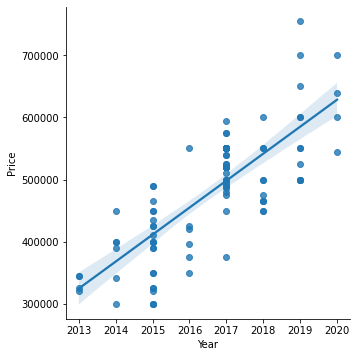

In [29]:
sns.pairplot(data, x_vars=['Year'], y_vars='Price', size=5, aspect=1, kind='reg')

In [30]:
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


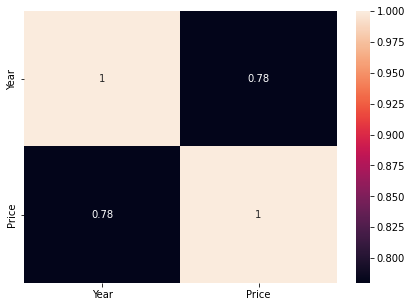

In [31]:
plt.figure(figsize=(7,5))
sns.heatmap(round(data.corr(),2),annot=True)
plt.show()

In [36]:
features = ['Price']               
target = ['Year']       

In [37]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [38]:
data[features]

,Price
0,465000
1,755000
2,700000
3,465000
4,465000
...,...
107,375000
108,300000
109,425000
110,420000


In [39]:
data[target]

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.05, random_state=5000)

In [41]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (106, 1)
y_train shape:  (106, 1)

Test cases as below
X_test shape:  (6, 1)
y_test shape:  (6, 1)


In [42]:
X_train.head()


,Price
75,490000
99,600000
6,425000
98,700000
111,425000


In [43]:
y_train.head()


,Year
75,2017
99,2020
6,2016
98,2020
111,2015


In [44]:
X_test.head()


,Price
60,490000
51,550000
12,500000
69,300000
9,575000


In [45]:
y_test.head()

,Year
60,2015
51,2018
12,2017
69,2015
9,2017


In [46]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)

In [47]:
lr_model.fit(X_train, y_train)


LinearRegression()

In [48]:
print('Intercept:',lr_model.intercept_)           
print('Coefficients:',lr_model.coef_)  

Intercept: [2009.84437215]
Coefficients: [[1.41092982e-05]]


In [49]:
X_train.columns

Index(['Price'], dtype='object')

In [50]:
(lr_model.coef_).T

array([[1.41092982e-05]])

In [52]:
pd.DataFrame((lr_model.coef_).T,index=X_train.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

,Co-efficients
Price,0.000014


In [53]:
y_pred_train = lr_model.predict(X_train)  

In [54]:
y_pred_train   

array([[2016.75792828],
       [2018.30995109],
       [2015.8408239 ],
       [2019.72088091],
       [2015.8408239 ],
       [2015.48809144],
       [2019.015416  ],
       [2016.40519582],
       [2017.18120723],
       [2014.35934758],
       [2016.40519582],
       [2016.89902126],
       [2015.13535898],
       [2017.60448617],
       [2016.89902126],
       [2017.60448617],
       [2015.34699846],
       [2017.18120723],
       [2017.60448617],
       [2017.18120723],
       [2017.04010014],
       [2014.42989407],
       [2016.89902126],
       [2018.30995109],
       [2015.62917031],
       [2015.8408239 ],
       [2014.35934758],
       [2016.19355635],
       [2017.60448617],
       [2016.19355635],
       [2016.89902126],
       [2017.18120723],
       [2017.46339319],
       [2016.54628881],
       [2016.19355635],
       [2017.60448617],
       [2016.40519582],
       [2017.18120723],
       [2016.6168353 ],
       [2014.78262653],
       [2017.95721863],
       [2016.899

In [55]:
y_pred_test = lr_model.predict(X_test)      

In [56]:
y_pred_test

array([[2016.75792828],
       [2017.60448617],
       [2016.89902126],
       [2014.07716162],
       [2017.95721863],
       [2016.89902126]])

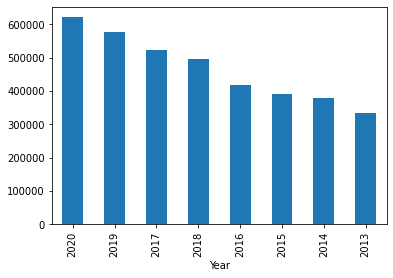

In [62]:
data.groupby(['Year'])['Price'].mean().sort_values(ascending=False).plot(kind = 'bar')